# Comprobación FFT

$5\sin(2\pi*6 t) + \sin(2\pi t)$

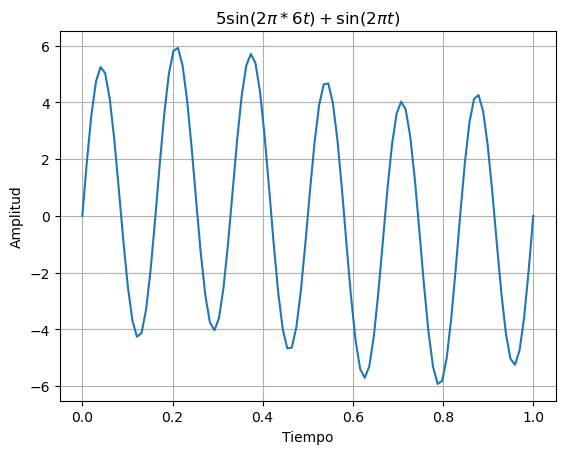

In [16]:
t = np.linspace(0, 1, 100) 
y = 5 * np.sin(2 * np.pi * 6 * t) + np.sin(2 * np.pi * t)
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('$5\sin(2\pi*6 t) + \sin(2\pi t)$')
plt.grid(True)
plt.show()

In [1]:
from scipy.fftpack import fft, fftfreq

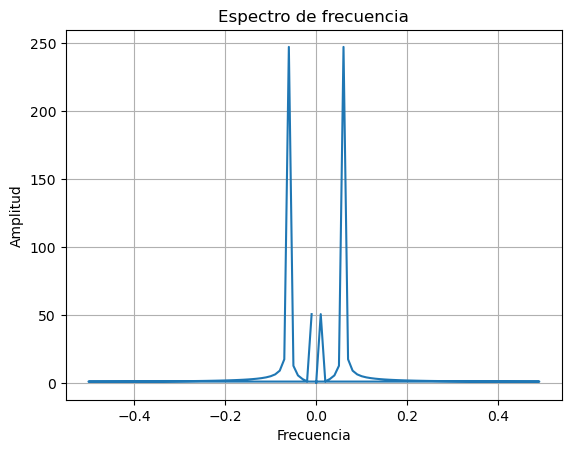

In [20]:
t = np.linspace(0, 1, 100)
y = 5 * np.sin(2 * np.pi * 6 * t) + np.sin(2 * np.pi * t)
fft_values = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(y))
plt.plot(frequencies, np.abs(fft_values))
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Espectro de frecuencia')
plt.grid(True)
plt.show()

# 100.mat

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import wiener

In [ ]:
info = open('100m.info', 'r')
x= info.readlines()
info.close()
for i in x:
    print(i)

In [ ]:
def freq_archivo(archivo):
    valores = {}
    with open(archivo, 'r') as f:
        lines = f.readlines()
    for line in lines:
        if line.startswith('Sampling frequency:'):
            freq = line.split(':')[1].strip().split()[0]
            valores['Sampling frequency'] = int(freq)
            break
    return valores['Sampling frequency']

In [ ]:
def signal_archivo(archivo):
    valores = {}
    with open(archivo, 'r') as f:
        lines = f.readlines()
    for line in lines:
        if line.startswith('Row\tSignal\tGain\tBase\tUnits'):
            units_line = lines[lines.index(line) + 1]
            units = units_line.strip().split('\t')
            signal = units[1].strip('[]')
            valores['Signal'] = signal
            break  
    return valores['Signal']

In [ ]:
def gain_archivo(archivo):
    valores = {}
    with open(archivo,'r') as f:
        lines = f.readlines()
    for line in lines:
        if line.startswith('Row\tSignal\tGain\tBase\tUnits'):
            units_line = lines[lines.index(line) + 1]  
            units = units_line.strip().split('\t')
            gain = units[2].strip('[]') 
            valores['Gain'] = gain  
            break
    return valores['Gain']

In [ ]:
def base_archivo(archivo):
    valores = {}
    with open(archivo,'r') as f:
        lines = f.readlines()
    for line in lines:
        if line.startswith('Row\tSignal\tGain\tBase\tUnits'):
            units_line = lines[lines.index(line) + 1]  
            units = units_line.strip().split('\t')
            base = units[3].strip('[]') 
            valores['Base'] = base 
            break
    return valores['Base']

In [ ]:
def unit_archivo(archivo):
    valores = {}
    with open(archivo,'r') as f:
        lines = f.readlines()
    for line in lines:
        if line.startswith('Row\tSignal\tGain\tBase\tUnits'):
            units_line = lines[lines.index(line) + 1]  
            units = units_line.strip().split('\t')
            unit = units[4].strip('[]') 
            valores['Units'] = unit
            break
    return valores['Units']

In [ ]:
freq_value = float(freq_archivo('100m.info'))
signal_value = signal_archivo('100m.info')
gain_value = float(gain_archivo('100m.info'))
base_value = float(base_archivo('100m.info'))
unit_value = unit_archivo('100m.info')

In [ ]:
x = loadmat('100m.mat')
print(len(x['val'][0]))
print((x['val'].astype(float) - base_value) / gain_value)

In [ ]:
def ecg(archivo, gain, base, frequency):
    x = loadmat(archivo)
    ecg1 = (x['val'] - base_value) / gain_value
    ecg = np.transpose(ecg1)
    time = 1 / freq_value
    t = np.linspace(0, np.size(ecg), np.size(ecg)) * time
    
    plt.plot(t, ecg)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (mV)')
    plt.title('ECG')
    plt.grid(True)
    plt.show()

In [ ]:
ecg('100m.mat', gain_value, base_value, freq_value)

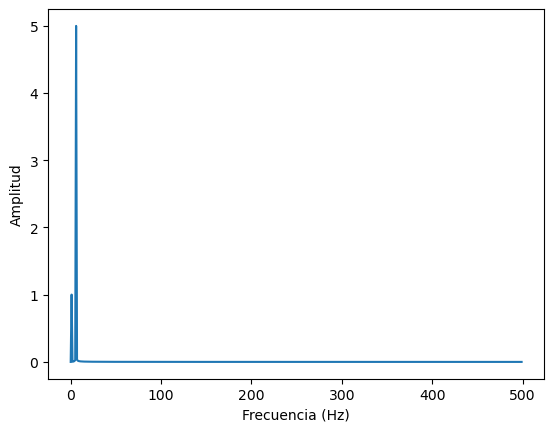

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de prueba
def my_function(t):
    return 5 * np.sin(2 * np.pi * 6 * t) + np.sin(2 * np.pi * t)

# Parámetros de la función
T = 1.0 / 1000.0  # Período de muestreo
N = 1000  # Número de puntos de datos
t = np.linspace(0.0, N*T, N)  # Eje de tiempo

# Calcular la Transformada de Fourier
f = np.fft.fft(my_function(t))

# Obtener las amplitudes correspondientes
amplitudes = np.abs(f)[:N//2] * 2 / N  # Se toma la mitad y se normaliza

# Obtener las frecuencias correspondientes
frecuencias = np.fft.fftfreq(N, T)[:N//2]

# Graficar los resultados
plt.plot(frecuencias, amplitudes)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()



In [13]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

def calcular_fft_desde_mat(archivo_mat):
    # Cargar los datos desde el archivo .mat
    data = scipy.io.loadmat(archivo_mat)

    # Obtener la señal de ECG del archivo
    ecg_signal = data['val'][0]

    # Obtener la frecuencia de muestreo del archivo
    freq_muestreo = 360

    # Calcular la Transformada de Fourier
    fft_result = np.fft.fft(ecg_signal)

    # Obtener las amplitudes correspondientes
    amplitudes = np.abs(fft_result)

    # Obtener las frecuencias correspondientes
    n = len(ecg_signal)
    frecuencias = np.fft.fftfreq(n, d=1/freq_muestreo)[:n//2]

    # Graficar los resultados
    plt.plot(frecuencias, amplitudes)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.title('Transformada de Fourier del ECG')
    plt.show()


ValueError: x and y must have same first dimension, but have shapes (1800,) and (3600,)

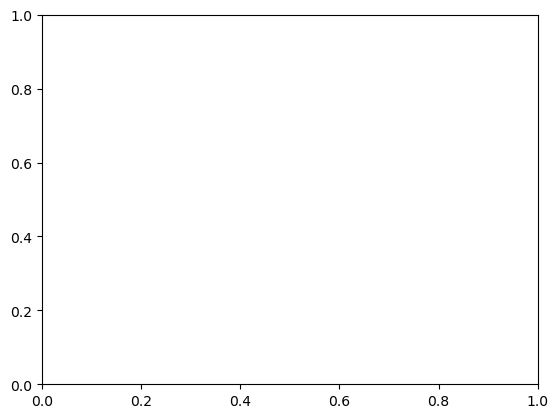

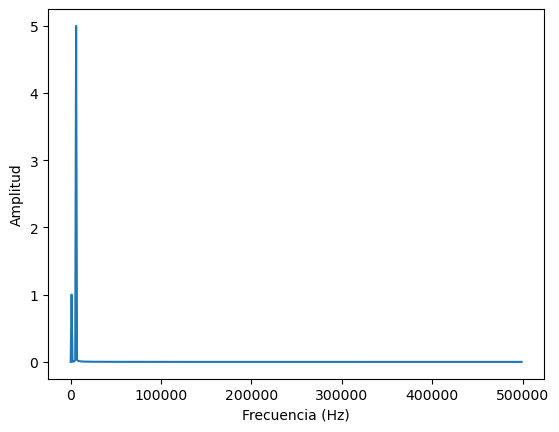

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de prueba
def my_function(t):
    return 5 * np.sin(2 * np.pi * 6 * t) + np.sin(2 * np.pi * t)

# Parámetros de la función
T = 1.0 / 1000.0  # Período de muestreo
N = 1000  # Número de puntos de datos
t = np.linspace(0.0, N*T, N)  # Eje de tiempo

# Calcular la Transformada de Fourier
f = np.fft.fft(my_function(t))

# Obtener las amplitudes correspondientes
amplitudes = np.abs(f)[:N//2] * 2 / N  # Se toma la mitad y se normaliza

# Obtener las frecuencias correspondientes
frecuencias = np.fft.fftfreq(N, T)[:N//2] * 1 / T

# Graficar los resultados
plt.plot(frecuencias, amplitudes)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()
